Import libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Loading the data set

In [47]:
credit_data = pd.read_csv('/content/creditcard.csv')

In [48]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Finding NUll values

In [49]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
credit_data[ 'Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Data visualizatioon

<Axes: xlabel='Class', ylabel='count'>

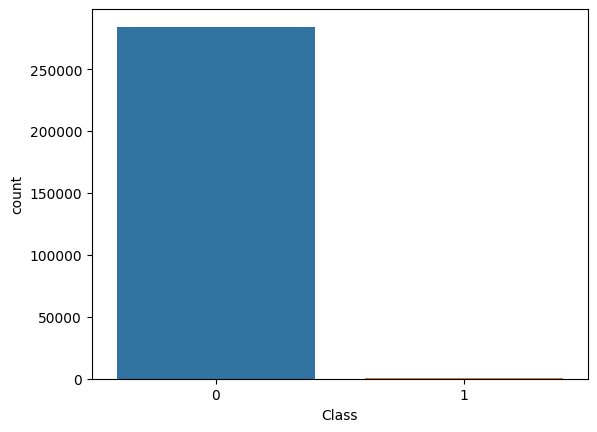

In [60]:
sns.countplot(x = 'Class', data = credit_data  )

In [54]:
good_trans = credit_data[credit_data.Class == 0 ]
fraud_trans  = credit_data[credit_data.Class == 1]

In [55]:
print(good_trans.shape)
print(fraud_trans.shape)

(284315, 31)
(492, 31)


In [56]:
good_trans.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [57]:
fraud_trans.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [59]:
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


splitting the data and creating new dataset

In [61]:
good_trans_sample = good_trans.sample(n = 492)

In [64]:
new_dataset = pd.concat([good_trans_sample, fraud_trans] ,axis = 0 )

In [65]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96058,65589.0,-4.507898,-3.180411,-0.224727,-0.748799,0.765284,-0.650127,-0.117206,-0.031871,-0.586207,...,-0.660974,-0.244560,-0.376824,-0.155501,-0.381348,0.857113,-0.967975,1.207161,114.98,0
184744,126370.0,-0.021049,0.556803,-0.850773,0.279584,0.420755,-0.857052,1.918991,-0.456013,-0.046472,...,0.104671,0.476137,0.553361,-0.168491,-1.646619,-1.136080,0.325558,0.292773,159.99,0
124899,77466.0,-1.250908,1.158612,1.223825,0.063318,-0.211771,-0.741833,0.234406,0.380584,-0.496874,...,-0.117679,-0.384030,0.265112,0.388792,-0.252610,0.063061,-0.094781,0.063192,1.98,0
223861,143556.0,-0.755190,0.055801,0.822424,-0.195193,-0.304560,-1.163094,-0.342659,0.438745,0.669557,...,0.483139,1.259868,0.094985,0.479946,-1.192515,-0.456338,0.195599,0.125145,9.99,0
60773,49495.0,1.311503,-0.806377,-0.141054,-0.977648,-0.382424,0.226963,-0.588829,0.044652,-0.606563,...,-0.118651,-0.630173,-0.069330,-1.367909,0.293202,-0.371502,0.005919,0.017283,86.70,0


In [66]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

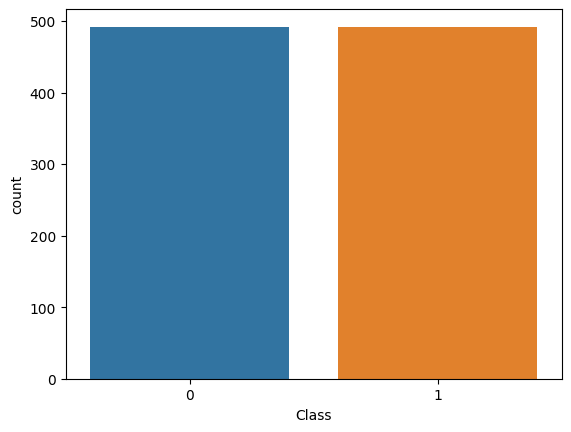

In [67]:
sns.countplot(x = 'Class', data = new_dataset )

In [71]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95449.623984,0.024193,-0.062216,-0.050696,-0.119306,-0.000551,0.010927,-0.055107,-0.078487,-0.034410,...,0.023686,0.023191,-0.037127,-0.007797,0.010999,-0.024526,-0.013786,-0.025377,-0.014156,96.207175
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


mechine learning model buliding

In [115]:
X = new_dataset.drop(columns = 'Class',axis = 1)
Y = new_dataset['Class']

In [73]:
X


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
96058,65589.0,-4.507898,-3.180411,-0.224727,-0.748799,0.765284,-0.650127,-0.117206,-0.031871,-0.586207,...,-1.703992,-0.660974,-0.244560,-0.376824,-0.155501,-0.381348,0.857113,-0.967975,1.207161,114.98
184744,126370.0,-0.021049,0.556803,-0.850773,0.279584,0.420755,-0.857052,1.918991,-0.456013,-0.046472,...,-0.417212,0.104671,0.476137,0.553361,-0.168491,-1.646619,-1.136080,0.325558,0.292773,159.99
124899,77466.0,-1.250908,1.158612,1.223825,0.063318,-0.211771,-0.741833,0.234406,0.380584,-0.496874,...,-0.105476,-0.117679,-0.384030,0.265112,0.388792,-0.252610,0.063061,-0.094781,0.063192,1.98
223861,143556.0,-0.755190,0.055801,0.822424,-0.195193,-0.304560,-1.163094,-0.342659,0.438745,0.669557,...,-0.177412,0.483139,1.259868,0.094985,0.479946,-1.192515,-0.456338,0.195599,0.125145,9.99
60773,49495.0,1.311503,-0.806377,-0.141054,-0.977648,-0.382424,0.226963,-0.588829,0.044652,-0.606563,...,0.201225,-0.118651,-0.630173,-0.069330,-1.367909,0.293202,-0.371502,0.005919,0.017283,86.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [75]:
Y

96058     0
184744    0
124899    0
223861    0
60773     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [123]:
X_train ,X_test,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.25, stratify =Y,random_state=10)

In [124]:
print(X_train.shape, X_test.shape)

(738, 30) (246, 30)


LogistiicRegression model

In [125]:
model = LogisticRegression()

In [126]:
model.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

data evaluation

In [127]:
X_train_prediction = model.predict(X_train)
accuracy = accuracy_score(X_train_prediction , Y_train )*100

In [128]:
print("accuracy  :", accuracy)

accuracy  : 93.36043360433605


In [129]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction , Y_test)*100
print("test accuracy:",test_accuracy)

test accuracy: 94.71544715447155
